# ABOUT DATASET:
The dataset has the columns correspond to various features of the employee's job and performance.

# OBJECTIVE:
To create a model to predict Whether the Employee will leave the Company or not.

# INPUT FEATURES:-
1. __satisfaction_level__	
2. __last_evaluation__	
3. __number_project__	
4. __average_montly_hours__	
5. __time_spend_company__
6. __Work_accident__		
7. __promotion_last_5years__	
8. __Department__
9. __salary__

# OUTPUT FEATURES:-
 1. __left__

# Importing Libraries

In [1]:
import numpy as np
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix,classification_report
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from scipy.stats import norm, boxcox
from scipy import stats
import warnings
warnings.filterwarnings('ignore')

# Getting Data

In [2]:
raw_data=pd.read_csv('HR_comma_sep.csv')

In [3]:
raw_data

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low
...,...,...,...,...,...,...,...,...,...,...
14994,0.40,0.57,2,151,3,0,1,0,support,low
14995,0.37,0.48,2,160,3,0,1,0,support,low
14996,0.37,0.53,2,143,3,0,1,0,support,low
14997,0.11,0.96,6,280,4,0,1,0,support,low


# Initial Review

In [4]:
raw_data.shape

(14999, 10)

In [5]:
raw_data.isnull().sum()

satisfaction_level       0
last_evaluation          0
number_project           0
average_montly_hours     0
time_spend_company       0
Work_accident            0
left                     0
promotion_last_5years    0
Department               0
salary                   0
dtype: int64

In [6]:
raw_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   satisfaction_level     14999 non-null  float64
 1   last_evaluation        14999 non-null  float64
 2   number_project         14999 non-null  int64  
 3   average_montly_hours   14999 non-null  int64  
 4   time_spend_company     14999 non-null  int64  
 5   Work_accident          14999 non-null  int64  
 6   left                   14999 non-null  int64  
 7   promotion_last_5years  14999 non-null  int64  
 8   Department             14999 non-null  object 
 9   salary                 14999 non-null  object 
dtypes: float64(2), int64(6), object(2)
memory usage: 1.1+ MB


# Checking Duplicates

In [7]:
raw_data.duplicated().sum()

3008

# Exploring categorical features

In [8]:
raw_data.salary.unique()

array(['low', 'medium', 'high'], dtype=object)

In [9]:
raw_data.Department.unique()

array(['sales', 'accounting', 'hr', 'technical', 'support', 'management',
       'IT', 'product_mng', 'marketing', 'RandD'], dtype=object)

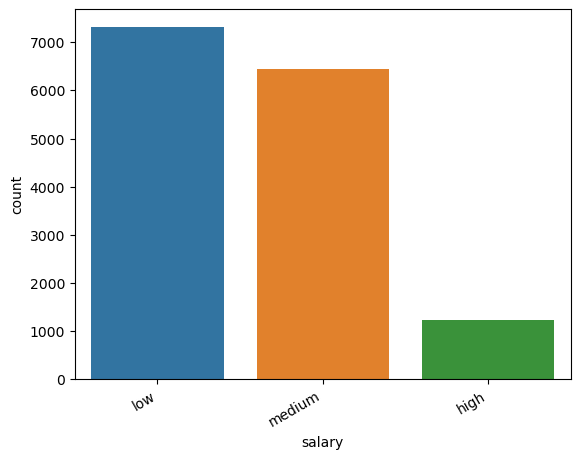

In [10]:
ax=sns.countplot(raw_data['salary'])
ax.set_xticklabels(raw_data['salary'].unique(),rotation=30,ha='right')
plt.show()

Larger number of employees are __underpaid__

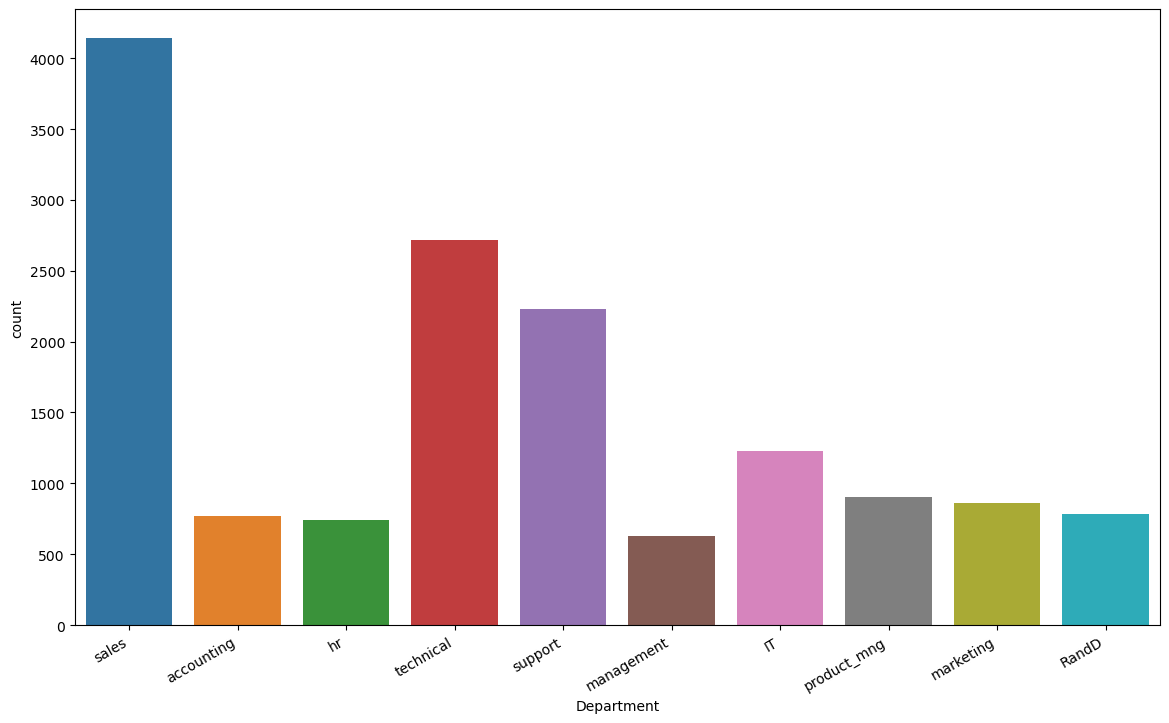

In [11]:
fig = plt.figure(figsize=(14,8))
ax=sns.countplot(raw_data['Department'])
ax.set_xticklabels(raw_data['Department'].unique(),rotation=30,ha='right')
plt.show()

__Sales__ has the highest number of employess!

In [12]:
Working_hours_dep=raw_data.groupby('Department')['average_montly_hours'].median()
Working_hours_dep

Department
IT             199.0
RandD          200.0
accounting     199.0
hr             197.0
management     204.0
marketing      198.0
product_mng    198.0
sales          201.0
support        200.0
technical      201.0
Name: average_montly_hours, dtype: float64

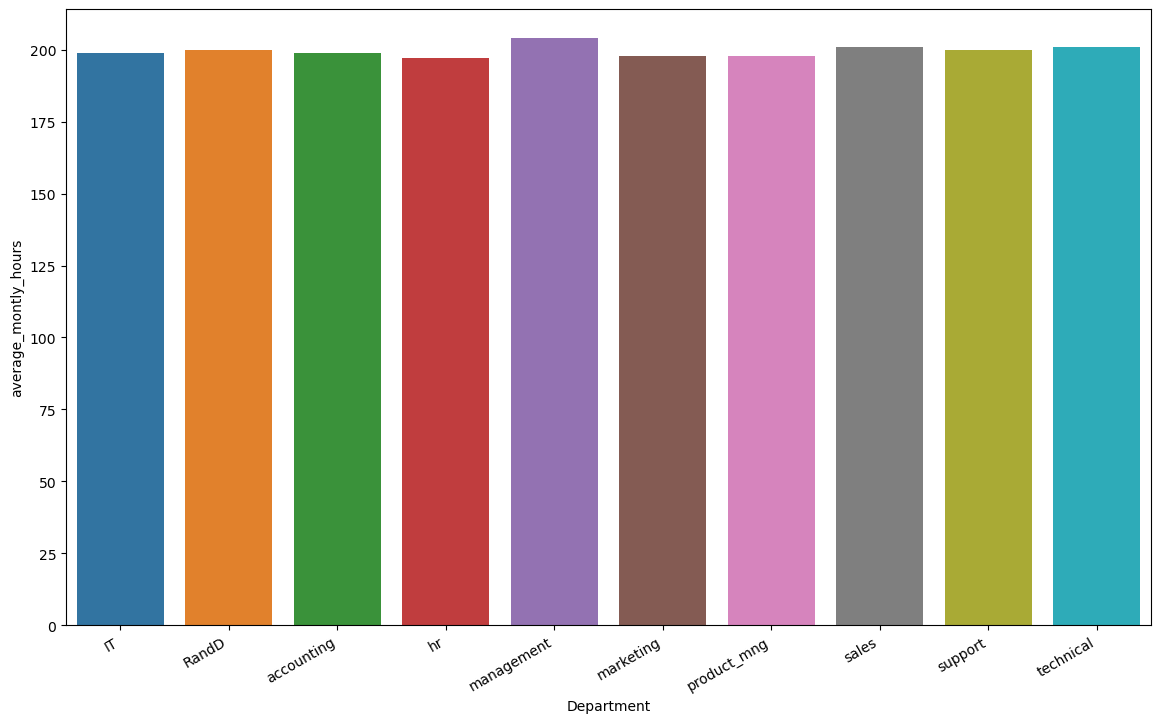

In [13]:
fig = plt.figure(figsize=(14,8))
ax=sns.barplot(x=Working_hours_dep.index,y= Working_hours_dep)
ax.set_xticklabels(Working_hours_dep.index,rotation=30,ha='right')
plt.show()

Management has a bit higher average monthly hours. Otherwise all the departments have almost same working hours.

In [14]:
Working_hours_sal=raw_data.groupby('salary')['average_montly_hours'].median()

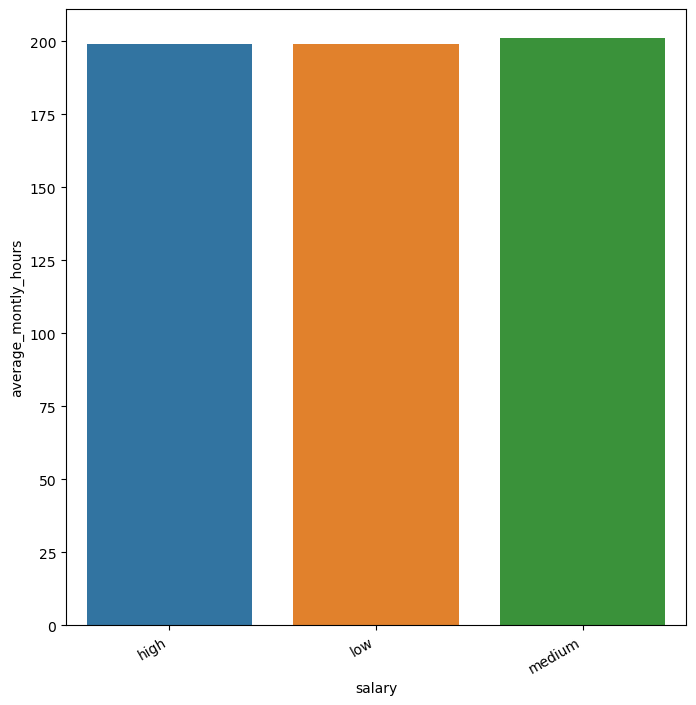

In [15]:
fig = plt.figure(figsize=(8,8))
ax=sns.barplot(x=Working_hours_sal.index,y= Working_hours_sal)
ax.set_xticklabels(Working_hours_sal.index,rotation=30,ha='right')
plt.show()

The working hours for high, low and medium salary workers are the same !

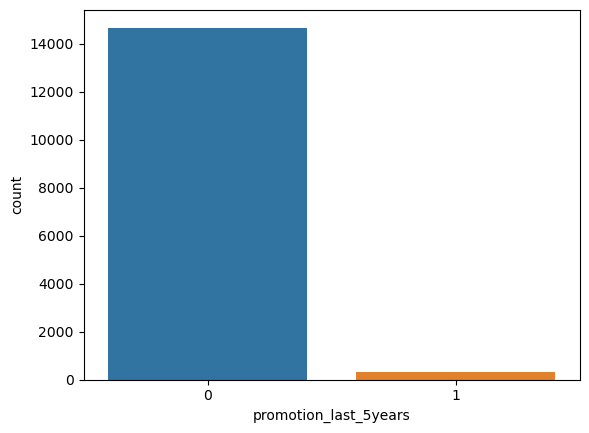

In [16]:
sns.countplot(raw_data['promotion_last_5years'])
plt.show()

The promotion has been fewer in the last 5 years!

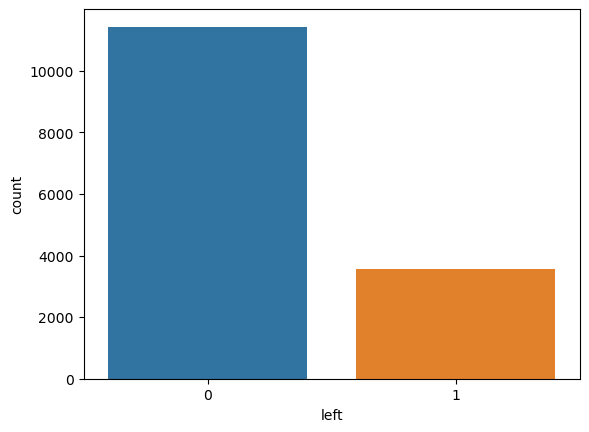

In [17]:
sns.countplot(raw_data['left'])
plt.show()

Fewer people left the organisation

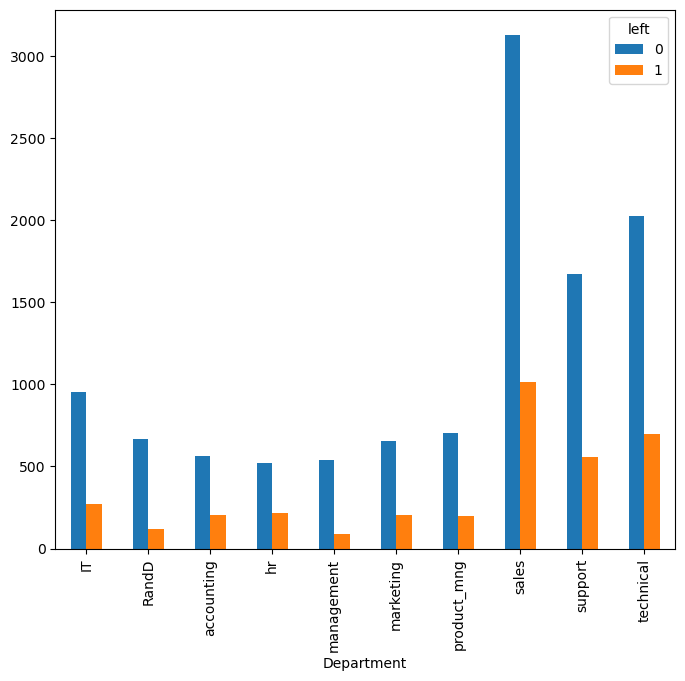

In [18]:
pd.crosstab(raw_data['Department'],raw_data['left']).plot(kind='bar',figsize=(8,7))
plt.show()

Lowest and the highest number of employees to leave and stay were from __Sales__

# Checking distribution of data

In [19]:
num_feat=['satisfaction_level','last_evaluation','number_project','average_montly_hours','time_spend_company']

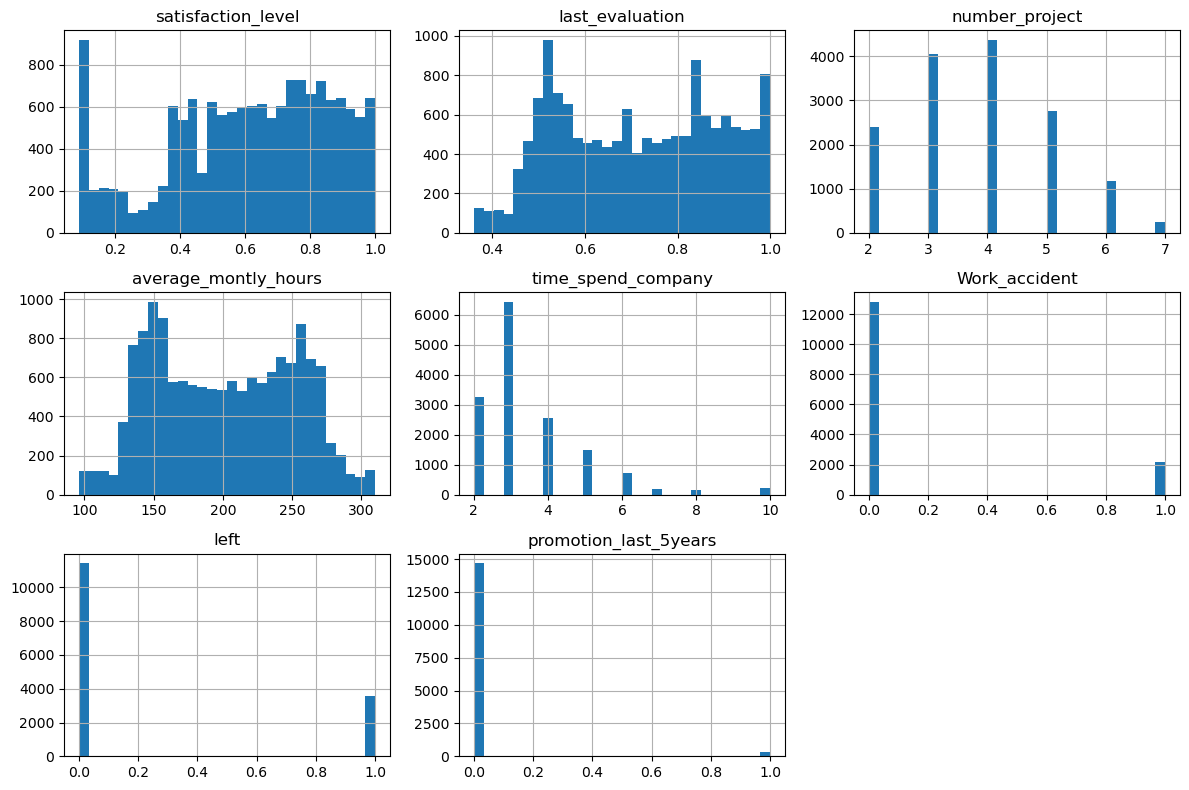

In [20]:
raw_data.hist(figsize=(12,8),bins=30)
plt.tight_layout()

# Checking Correlation B/w Input & Target Variable

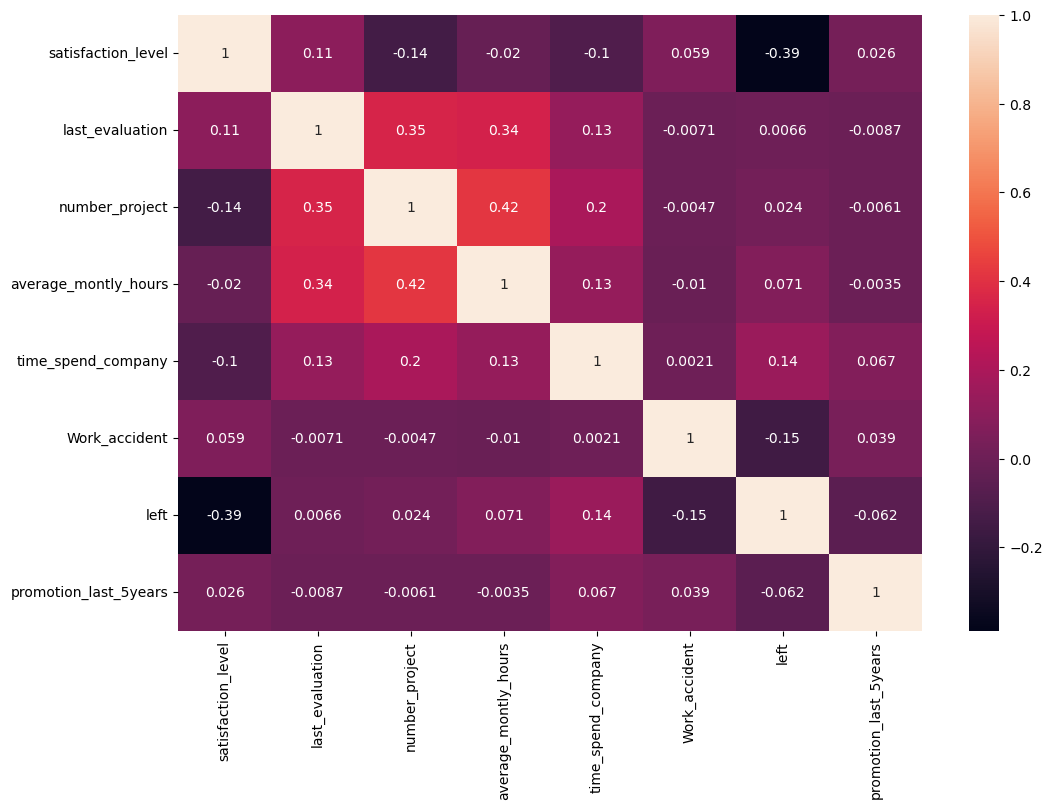

In [21]:
fig = plt.figure(figsize=(12,8))
sns.heatmap(raw_data.corr(),annot=True)
plt.show()


There is <font color=green>__positive__</font> correlation between:
- Number of Projects and Average monthly hours
- Average monthly hours and last evaluation
- last evaluation and Number of Projects

There is <font color=green>__negative__</font> correlation between:
- left and satisfcation_level
- left and Work_accident
- left and promotion_last_5years

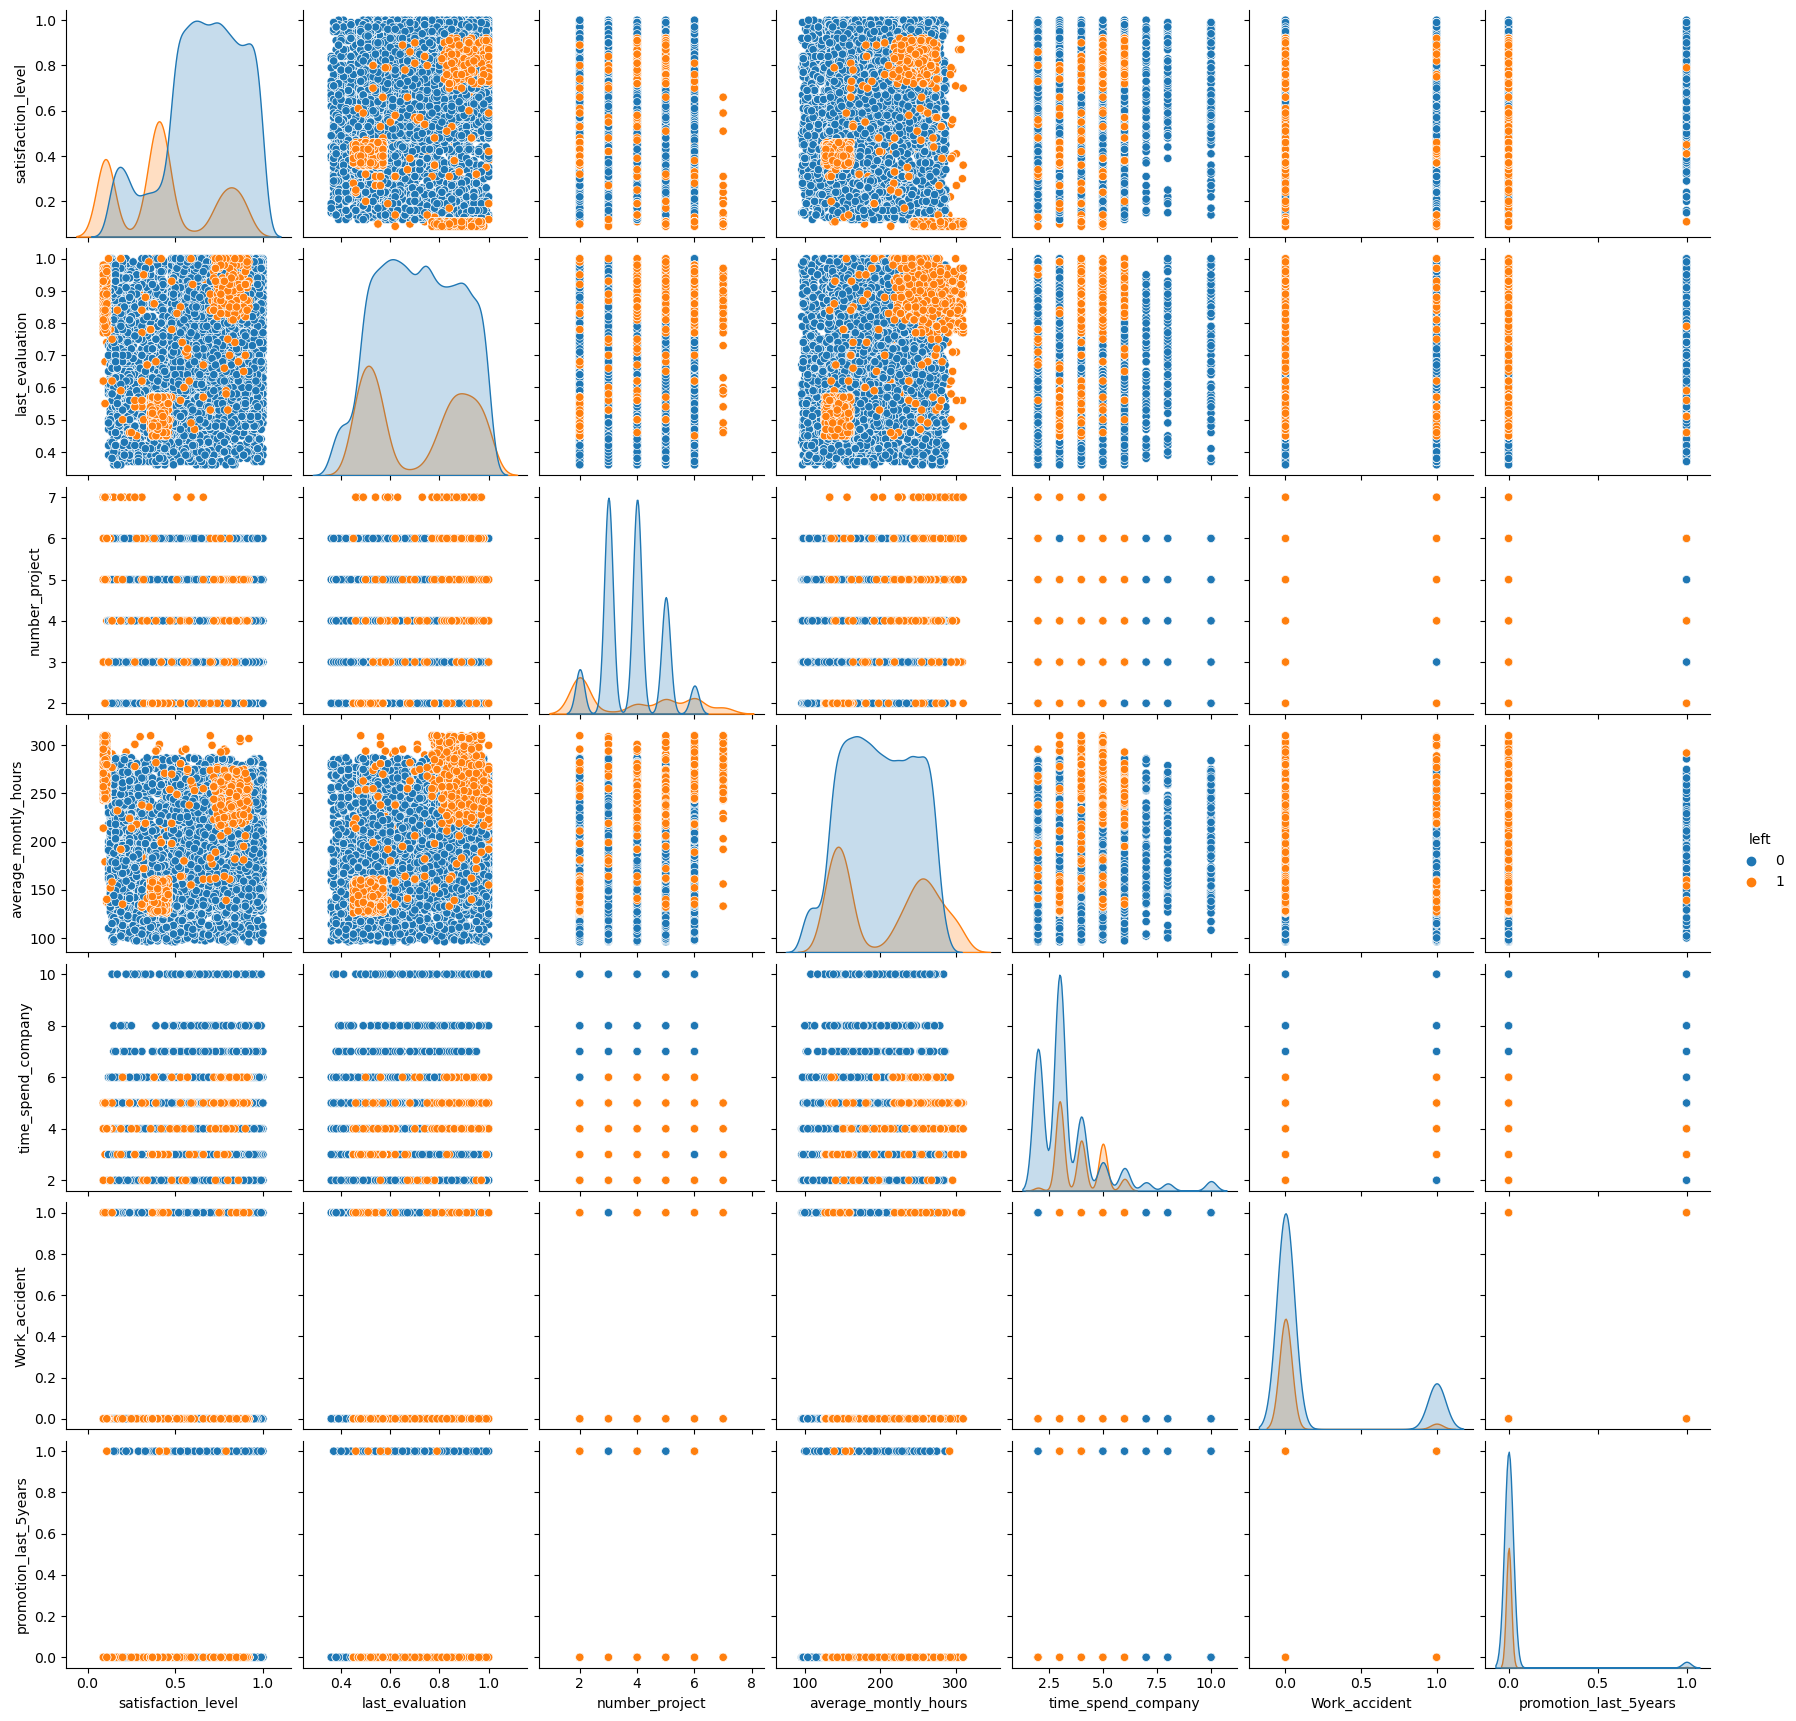

In [22]:
sns.pairplot(data=raw_data, hue='left')
plt.show()

# Checking Outliers

In [23]:
num_feat

['satisfaction_level',
 'last_evaluation',
 'number_project',
 'average_montly_hours',
 'time_spend_company']

In [24]:
col=['satisfaction_level','last_evaluation','number_project','average_montly_hours','time_spend_company','Work_accident','left','promotion_last_5years','Department','salary']

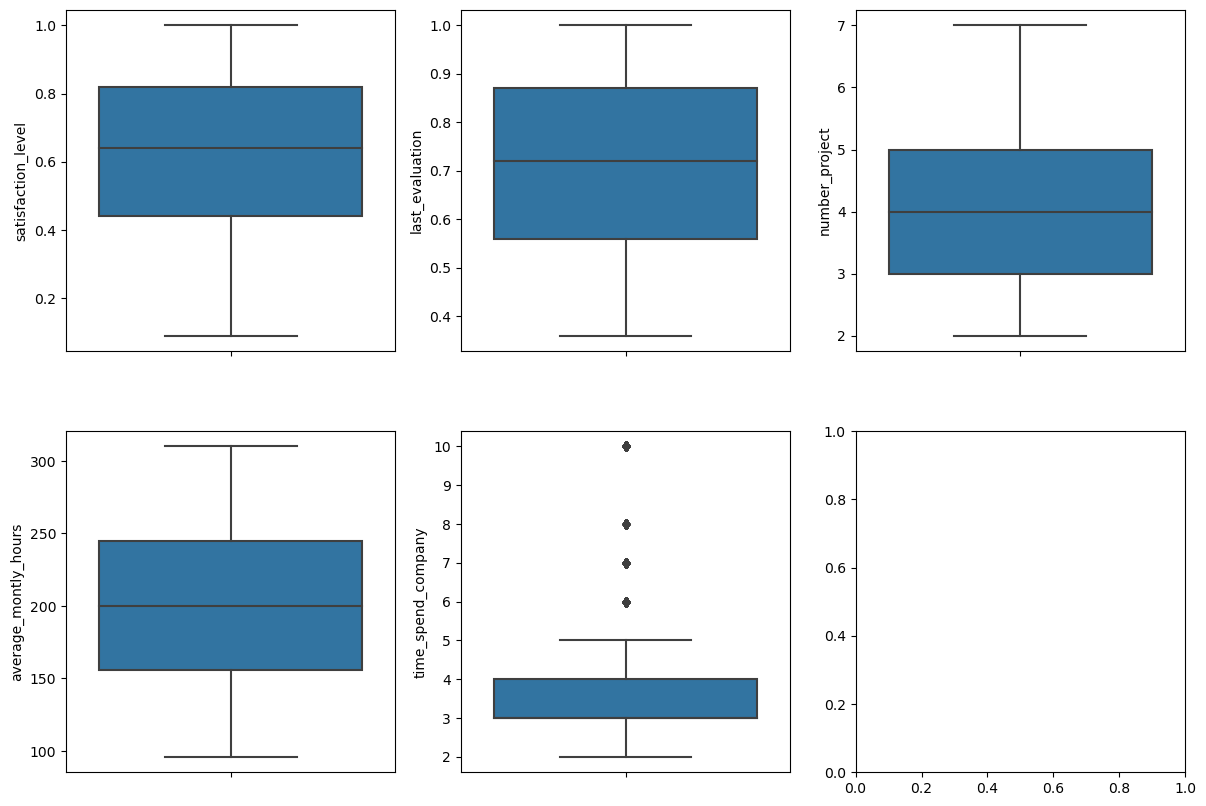

In [25]:
fig,ax=plt.subplots(2,3,figsize=(12,8))
index=0
ax=ax.flatten()
for col in num_feat:
    sns.boxplot(y=col,data=raw_data,ax=ax[index])
    index+=1
plt.tight_layout(pad=0.5, w_pad=1, h_pad=5.0)

# Selecting Features

In [26]:
valid_data=raw_data[['satisfaction_level','average_montly_hours','promotion_last_5years','salary','last_evaluation']]
valid_data

,satisfaction_level,average_montly_hours,promotion_last_5years,salary,last_evaluation
0,0.38,157,0,low,0.53
1,0.80,262,0,medium,0.86
2,0.11,272,0,medium,0.88
3,0.72,223,0,low,0.87
4,0.37,159,0,low,0.52
...,...,...,...,...,...
14994,0.40,151,0,low,0.57
14995,0.37,160,0,low,0.48
14996,0.37,143,0,low,0.53
14997,0.11,280,0,low,0.96


In [27]:
valid_data.salary.unique()

array(['low', 'medium', 'high'], dtype=object)

In [28]:
data_with_dummies=pd.get_dummies(valid_data,drop_first="True")
data_with_dummies

,satisfaction_level,average_montly_hours,promotion_last_5years,last_evaluation,salary_low,salary_medium
0,0.38,157,0,0.53,1,0
1,0.80,262,0,0.86,0,1
2,0.11,272,0,0.88,0,1
3,0.72,223,0,0.87,1,0
4,0.37,159,0,0.52,1,0
...,...,...,...,...,...,...
14994,0.40,151,0,0.57,1,0
14995,0.37,160,0,0.48,1,0
14996,0.37,143,0,0.53,1,0
14997,0.11,280,0,0.96,1,0


In [29]:
inputed_val=data_with_dummies.copy()
inputed_val

,satisfaction_level,average_montly_hours,promotion_last_5years,last_evaluation,salary_low,salary_medium
0,0.38,157,0,0.53,1,0
1,0.80,262,0,0.86,0,1
2,0.11,272,0,0.88,0,1
3,0.72,223,0,0.87,1,0
4,0.37,159,0,0.52,1,0
...,...,...,...,...,...,...
14994,0.40,151,0,0.57,1,0
14995,0.37,160,0,0.48,1,0
14996,0.37,143,0,0.53,1,0
14997,0.11,280,0,0.96,1,0


In [30]:
predicted_val=raw_data['left']

# Splitting dataset

In [31]:
x_train,x_test,y_train,y_test=train_test_split(inputed_val,predicted_val,test_size=1/3,random_state=1)

# Creating Logistic Regression Model

In [32]:
logistic_model=LogisticRegression(C=3.727593720314938)

In [33]:
logistic_model.fit(x_train,y_train)

LogisticRegression(C=3.727593720314938)

In [34]:
y_pred=logistic_model.predict_proba(x_test)
y_pred

array([[0.8504049 , 0.1495951 ],
       [0.74121215, 0.25878785],
       [0.79800617, 0.20199383],
       ...,
       [0.54980933, 0.45019067],
       [0.69399915, 0.30600085],
       [0.59671357, 0.40328643]])

# Evaluation M

In [35]:
logistic_model.score(x_test,y_test)

0.7728

In [36]:
y_hat=y_pred=logistic_model.predict(x_test)

In [37]:
conf1=confusion_matrix(y_test,y_hat)
conf1

array([[3537,  251],
       [ 885,  327]])

<AxesSubplot:>

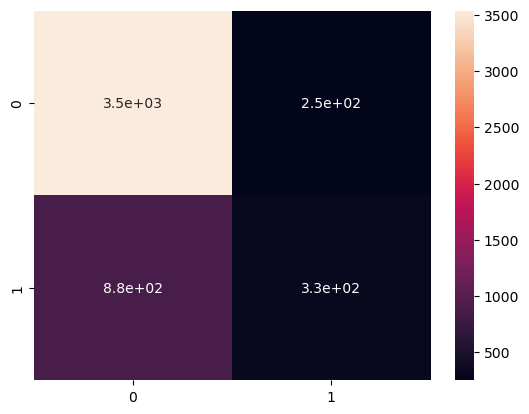

In [38]:
import seaborn as sns
sns.heatmap(conf1,annot=True)

In [39]:
x=classification_report(y_test,y_hat)

In [40]:
print(x)

              precision    recall  f1-score   support

           0       0.80      0.93      0.86      3788
           1       0.57      0.27      0.37      1212

    accuracy                           0.77      5000
   macro avg       0.68      0.60      0.61      5000
weighted avg       0.74      0.77      0.74      5000



In [41]:
logistic_model.coef_

array([[-3.81524255e+00,  1.99300488e-03, -1.52670475e+00,
        -1.13728757e-03,  1.82833681e+00,  1.36091418e+00]])

In [42]:
from sklearn.model_selection import GridSearchCV
import numpy as np

In [43]:
c_space = np.logspace(-5, 8, 15)
param_grid = {'C': c_space}

In [44]:
logreg_cv = GridSearchCV(logistic_model, param_grid, cv = 5)

In [45]:
logreg_cv.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=LogisticRegression(C=3.727593720314938),
             param_grid={'C': array([1.00000000e-05, 8.48342898e-05, 7.19685673e-04, 6.10540230e-03,
       5.17947468e-02, 4.39397056e-01, 3.72759372e+00, 3.16227766e+01,
       2.68269580e+02, 2.27584593e+03, 1.93069773e+04, 1.63789371e+05,
       1.38949549e+06, 1.17876863e+07, 1.00000000e+08])})

In [46]:
print("Tuned Logistic Regression Parameters: {}".format(logreg_cv.best_params_))
print("Best score is {}".format(logreg_cv.best_score_))
Accuracy1=logreg_cv.best_score_


Tuned Logistic Regression Parameters: {'C': 0.05179474679231213}
Best score is 0.7956789894947475


# SVM ALGORITHM

In [47]:
valid_data=raw_data[['satisfaction_level','average_montly_hours','promotion_last_5years','salary','Department']]
valid_data.head()

,satisfaction_level,average_montly_hours,promotion_last_5years,salary,Department
0,0.38,157,0,low,sales
1,0.80,262,0,medium,sales
2,0.11,272,0,medium,sales
3,0.72,223,0,low,sales
4,0.37,159,0,low,sales


In [48]:
data_with_dummies=pd.get_dummies(valid_data,drop_first=True)
data_with_dummies.head()

,satisfaction_level,average_montly_hours,promotion_last_5years,salary_low,salary_medium,Department_RandD,Department_accounting,Department_hr,Department_management,Department_marketing,Department_product_mng,Department_sales,Department_support,Department_technical
0,0.38,157,0,1,0,0,0,0,0,0,0,1,0,0
1,0.80,262,0,0,1,0,0,0,0,0,0,1,0,0
2,0.11,272,0,0,1,0,0,0,0,0,0,1,0,0
3,0.72,223,0,1,0,0,0,0,0,0,0,1,0,0
4,0.37,159,0,1,0,0,0,0,0,0,0,1,0,0


In [49]:
inputed_val=data_with_dummies.copy()
predicted_val=raw_data['left']

In [50]:
x_train,x_test,y_train,y_test=train_test_split(inputed_val,predicted_val,train_size=0.7,random_state=None)

In [51]:
from sklearn.svm import LinearSVC
# create an SVM classifier with a linear kernel
model = LinearSVC(C=3.66,random_state=1)
# train the classifier using the training data
model.fit(x_train, y_train)

LinearSVC(C=3.66, random_state=1)

In [52]:
# make predictions using the testing data
y_pred = model.predict(x_test)

In [53]:
conf2=confusion_matrix(y_test,y_pred)
conf2

array([[3195,  208],
       [ 816,  281]])

<AxesSubplot:>

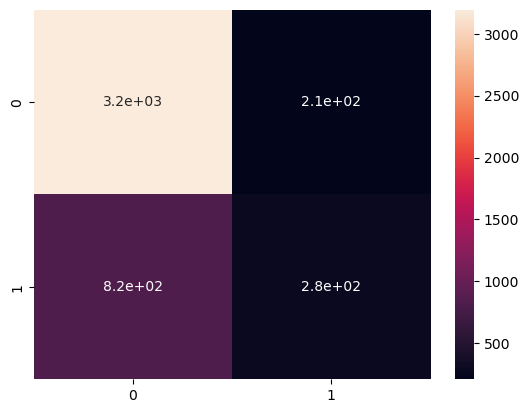

In [54]:
sns.heatmap(conf2,annot=True)

In [55]:
Accuracy2=model.score(x_test,y_test)
Accuracy2

0.7724444444444445

In [56]:
x=classification_report(y_test,y_pred)
print(x)

              precision    recall  f1-score   support

           0       0.80      0.94      0.86      3403
           1       0.57      0.26      0.35      1097

    accuracy                           0.77      4500
   macro avg       0.69      0.60      0.61      4500
weighted avg       0.74      0.77      0.74      4500



# Ridge Classsifier

In [57]:
from sklearn.linear_model import RidgeClassifierCV
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder
import random

numeric_transformer = Pipeline(
    steps=[('scaler', StandardScaler())]
)

categorical_transformer = OneHotEncoder(handle_unknown="ignore")



preprocessor = ColumnTransformer(
    transformers=[
        ('scaler', StandardScaler(),x_train.columns)
    ]
)

model = Pipeline(
    steps=[("preprocessor", preprocessor), 
            ("model", RidgeClassifierCV(alphas=[ random.uniform(0.1,1)* 10**x for x in range(-3,2) for _ in range(20)], cv=5))
           ]
)


In [58]:
model.fit(x_train,y_train)
y_pred = model.predict(x_test)
conf3=confusion_matrix(y_test,y_pred)
conf3

array([[3252,  151],
       [ 824,  273]])

<AxesSubplot:>

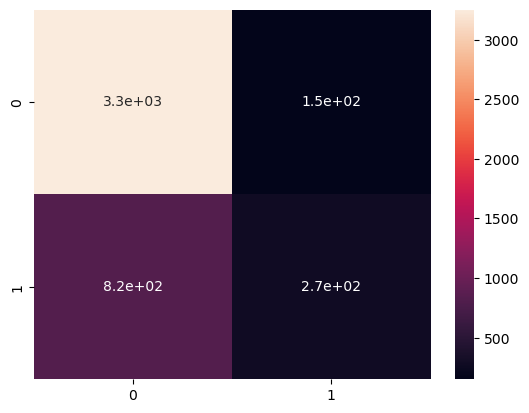

In [59]:
sns.heatmap(conf3,annot=True)

In [60]:
Accuracy3=model['model'].best_score_
Accuracy3

0.7899804442024547

In [61]:
from sklearn.preprocessing import PolynomialFeatures

#The preprocessor will rescale columns and add polynomial features
preprocessor = ColumnTransformer(
    transformers=[
        ("poly", PolynomialFeatures(8), ['satisfaction_level', 'last_evaluation','average_montly_hours'] ),
        ("poly2", PolynomialFeatures(2), ['number_project','time_spend_company']),
        ('scaler', StandardScaler(), x_train.columns)
    ]
)


model = Pipeline(
    steps=[("preprocessor", preprocessor), 
            ("model", RidgeClassifierCV(alphas=[ random.uniform(0.1,1)* 10**x for x in range(-3,2) for _ in range(10)], cv=5))
           ]
)
model.fit(x_train,y=y_train)
model['model'].best_score_

ValueError: A given column is not a column of the dataframe

In [ ]:
x_train

# Comparing Accuracy of Models

In [ ]:
model_list=['Logistic Regression','SVM','Ridge Classifier']
acc_list=[Accuracy1,Accuracy2,Accuracy3]
result1=pd.DataFrame({'Model':model_list, 'Accuracy': acc_list})
result1

# Plotting Confusion Matrix

In [ ]:
cm_list=[conf1,conf2,conf3]
# Plot confusion matrix
fig = plt.figure(figsize = (18,10))
for i in range(len(cm_list)):
    cm = cm_list[i]
    model = model_list[i]
    sub = fig.add_subplot(2, 3, i+1).set_title(model)
    cm_plot = sns.heatmap(cm, annot=True, cmap = 'Blues_r')
    cm_plot.set_xlabel('Predicted Values')
    cm_plot.set_ylabel('Actual Values ')

# Plotting Accuracy of Models

In [ ]:
plt.plot(model_list,acc_list, label='Models')
plt.xlabel('Models')
plt.ylabel('Accuracy')
plt.title('Accuracy Comparison of Three Models')

plt.show()


# LOGISTIC REGRESSION IS THE BEST MODEL WITH ACCURACY 0.795279


# PYTHON 


In [ ]:
# Importing Psycopg2 library 
import psycopg2 
import pandas as pd
connection=psycopg2.connect(database='spatial',user="postgres",password='2882')
cursor=connection.cursor()
cursor.execute("DROP TABLE IF EXISTS HR")
cursor.execute("create table HR(satisfaction_level numeric,last_evaluation numeric,number_project numeric,average_montly_hours numeric,time_spend_company numeric,Work_accident numeric, Remove numeric ,promotion_last_5years numeric,Department varchar(64),salary varchar(20))")
connection.commit()
df=pd.read_csv('/Users/aveshbhati/Downloads/HR_comma_sep.csv')
print("_____________________________________________________")
for i in df.index:
    vals=[df.at[i,col] for col in list(df.columns)]
    print(vals)
    query="insert into HR values('%s','%s','%s','%s','%s','%s','%s','%s','%s','%s')" %(vals[0],vals[1],vals[2],vals[3],vals[4],vals[5],vals[6],vals[7],vals[8],vals[9])
    cursor.execute(query)
connection.commit()
cursor.execute('Select * from HR') 
cursor.fetchall()
cursor.close()
connection.close()


# GEOPANDAS

In [ ]:
import geopandas as gpd
#reading the shape file
file="/Users/aveshbhati/Desktop/untitled folder/INDIA_states.shp"
gdf=gpd.read_file(file)
credit=pd.read_excel(r"/Users/aveshbhati/Downloads/credit score.xlsx")
#merging the data with the shape file
gdf=gdf.merge(credit, on="ST_NAME")
gdf

In [ ]:
gdf.plot()

In [4]:
gdf['centroid']=gdf.centroid
gdf

/var/folders/9c/cq9s_h_x4tj4cvbbzhypgr8w0000gn/T/ipykernel_1674/3887230092.py:1: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  gdf['centroid']=gdf.centroid


,ST_NAME,geometry,Credit card user,centroid
0,ANDAMAN AND NICOBAR ISLANDS,"MULTIPOLYGON (((92.89889 12.91583, 92.89917 12...",5340,POINT (92.96817 11.22606)
1,Andhra Pradesh,"POLYGON ((83.94319 18.21431, 83.94236 18.21431...",176646,POINT (79.56407 16.58250)
2,Arunachal Pradesh,"POLYGON ((94.86086 27.73948, 94.86603 27.73624...",4920,POINT (94.67515 28.03873)
3,Assam,"POLYGON ((95.59917 27.22961, 95.59009 27.22952...",31520,POINT (92.83036 26.35713)
4,Bihar,"POLYGON ((87.95561 25.53805, 87.95239 25.53646...",228112,POINT (85.60483 25.67965)
5,CHANDIGARH,"POLYGON ((76.69267 30.74471, 76.69068 30.74666...",10160,POINT (76.76828 30.73384)
6,Chhattisgarh,"POLYGON ((83.79799 22.28996, 83.79752 22.28949...",385269,POINT (82.03537 21.26470)
7,DADRA AND NAGAR HAVELI,"POLYGON ((72.98532 20.11345, 72.97963 20.12530...",1961,POINT (73.08090 20.19474)
8,DAMAN AND DIU,"MULTIPOLYGON (((70.96208 20.72208, 70.96347 20...",15308,POINT (71.66120 20.60218)
9,Goa,"POLYGON ((74.26171 14.99076, 74.26330 14.98899...",2336,POINT (74.05788 15.35954)


In [5]:
gdf["Boundary"]=gdf.boundary
gdf

,ST_NAME,geometry,Credit card user,centroid,Boundary
0,ANDAMAN AND NICOBAR ISLANDS,"MULTIPOLYGON (((92.89889 12.91583, 92.89917 12...",5340,POINT (92.96817 11.22606),"MULTILINESTRING ((92.89889 12.91583, 92.89917 ..."
1,Andhra Pradesh,"POLYGON ((83.94319 18.21431, 83.94236 18.21431...",176646,POINT (79.56407 16.58250),"MULTILINESTRING ((83.94319 18.21431, 83.94236 ..."
2,Arunachal Pradesh,"POLYGON ((94.86086 27.73948, 94.86603 27.73624...",4920,POINT (94.67515 28.03873),"LINESTRING (94.86086 27.73948, 94.86603 27.736..."
3,Assam,"POLYGON ((95.59917 27.22961, 95.59009 27.22952...",31520,POINT (92.83036 26.35713),"LINESTRING (95.59917 27.22961, 95.59009 27.229..."
4,Bihar,"POLYGON ((87.95561 25.53805, 87.95239 25.53646...",228112,POINT (85.60483 25.67965),"LINESTRING (87.95561 25.53805, 87.95239 25.536..."
5,CHANDIGARH,"POLYGON ((76.69267 30.74471, 76.69068 30.74666...",10160,POINT (76.76828 30.73384),"LINESTRING (76.69267 30.74471, 76.69068 30.746..."
6,Chhattisgarh,"POLYGON ((83.79799 22.28996, 83.79752 22.28949...",385269,POINT (82.03537 21.26470),"MULTILINESTRING ((83.79799 22.28996, 83.79752 ..."
7,DADRA AND NAGAR HAVELI,"POLYGON ((72.98532 20.11345, 72.97963 20.12530...",1961,POINT (73.08090 20.19474),"LINESTRING (72.98532 20.11345, 72.97963 20.125..."
8,DAMAN AND DIU,"MULTIPOLYGON (((70.96208 20.72208, 70.96347 20...",15308,POINT (71.66120 20.60218),"MULTILINESTRING ((70.96208 20.72208, 70.96347 ..."
9,Goa,"POLYGON ((74.26171 14.99076, 74.26330 14.98899...",2336,POINT (74.05788 15.35954),"LINESTRING (74.26171 14.99076, 74.26330 14.988..."


In [6]:
gdf.size

175

In [7]:
gdf['Area']=gdf.area
gdf

/var/folders/9c/cq9s_h_x4tj4cvbbzhypgr8w0000gn/T/ipykernel_1674/3284510118.py:1: UserWarning: Geometry is in a geographic CRS. Results from 'area' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  gdf['Area']=gdf.area


,ST_NAME,geometry,Credit card user,centroid,Boundary,Area
0,ANDAMAN AND NICOBAR ISLANDS,"MULTIPOLYGON (((92.89889 12.91583, 92.89917 12...",5340,POINT (92.96817 11.22606),"MULTILINESTRING ((92.89889 12.91583, 92.89917 ...",0.630493
1,Andhra Pradesh,"POLYGON ((83.94319 18.21431, 83.94236 18.21431...",176646,POINT (79.56407 16.58250),"MULTILINESTRING ((83.94319 18.21431, 83.94236 ...",23.315352
2,Arunachal Pradesh,"POLYGON ((94.86086 27.73948, 94.86603 27.73624...",4920,POINT (94.67515 28.03873),"LINESTRING (94.86086 27.73948, 94.86603 27.736...",7.529301
3,Assam,"POLYGON ((95.59917 27.22961, 95.59009 27.22952...",31520,POINT (92.83036 26.35713),"LINESTRING (95.59917 27.22961, 95.59009 27.229...",7.091648
4,Bihar,"POLYGON ((87.95561 25.53805, 87.95239 25.53646...",228112,POINT (85.60483 25.67965),"LINESTRING (87.95561 25.53805, 87.95239 25.536...",8.473771
5,CHANDIGARH,"POLYGON ((76.69267 30.74471, 76.69068 30.74666...",10160,POINT (76.76828 30.73384),"LINESTRING (76.69267 30.74471, 76.69068 30.746...",0.011125
6,Chhattisgarh,"POLYGON ((83.79799 22.28996, 83.79752 22.28949...",385269,POINT (82.03537 21.26470),"MULTILINESTRING ((83.79799 22.28996, 83.79752 ...",11.790087
7,DADRA AND NAGAR HAVELI,"POLYGON ((72.98532 20.11345, 72.97963 20.12530...",1961,POINT (73.08090 20.19474),"LINESTRING (72.98532 20.11345, 72.97963 20.125...",0.042478
8,DAMAN AND DIU,"MULTIPOLYGON (((70.96208 20.72208, 70.96347 20...",15308,POINT (71.66120 20.60218),"MULTILINESTRING ((70.96208 20.72208, 70.96347 ...",0.003584
9,Goa,"POLYGON ((74.26171 14.99076, 74.26330 14.98899...",2336,POINT (74.05788 15.35954),"LINESTRING (74.26171 14.99076, 74.26330 14.988...",0.310112


<AxesSubplot:>

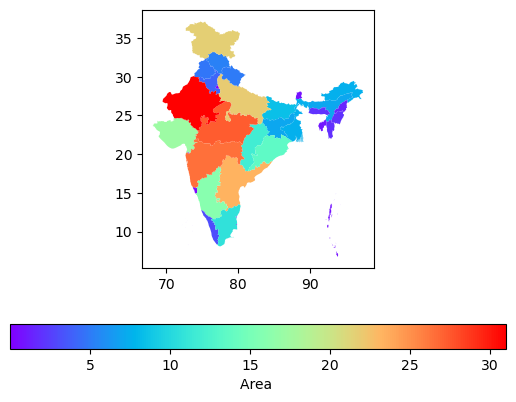

In [8]:
gdf.plot(column='Area',legend=True,legend_kwds={'label':'Area ','orientation':'horizontal'},cmap='rainbow')

In [9]:
# Calculating Distance
reference_point=gdf['centroid'].iloc[2]
gdf['distance']=gdf['centroid'].distance(reference_point)
gdf['distance']

/var/folders/9c/cq9s_h_x4tj4cvbbzhypgr8w0000gn/T/ipykernel_1674/2820056515.py:3: UserWarning: Geometry is in a geographic CRS. Results from 'distance' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  gdf['distance']=gdf['centroid'].distance(reference_point)


0     16.899107
1     18.962858
2      0.000000
3      2.496203
4      9.372082
5     18.108555
6     14.340559
7     22.974765
8     24.185622
9     24.204010
10    23.756534
11    18.379330
12    17.870152
13    19.482566
14    10.116835
15    22.811306
16    25.361577
17    27.959833
18    16.992025
19    20.456068
20     3.393436
21     4.218251
22     5.073566
23     1.982161
24    17.576684
25    12.723956
26    21.975531
27    19.470825
28    20.877956
29     6.220001
30    23.559178
31     5.197598
32    14.158391
33    15.620292
34     7.914394
Name: distance, dtype: float64

<AxesSubplot:>

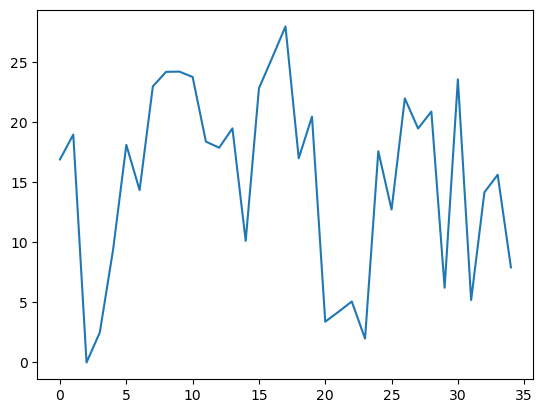

In [10]:
gdf['distance'].plot()

/var/folders/9c/cq9s_h_x4tj4cvbbzhypgr8w0000gn/T/ipykernel_1674/3409957761.py:2: UserWarning: Geometry is in a geographic CRS. Results from 'buffer' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  gdf["Buffered"]=gdf.buffer(3)


<AxesSubplot:>

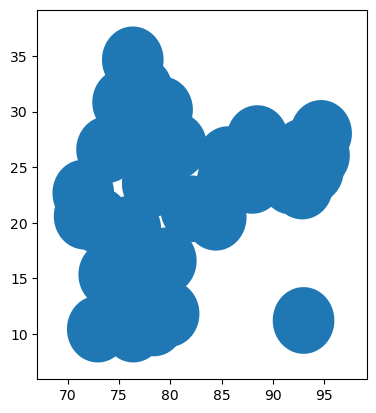

In [11]:
gdf=gdf.set_geometry("centroid")
gdf["Buffered"]=gdf.buffer(3)
gdf["Buffered"].plot()

In [12]:
# Number of Credit Card Users State Wise
fig, ax=plt.subplots(1,1,figsize=(10,6))
gdf.plot(column='Credit card user',ax=ax,legend=True,cmap='rainbow')
ax.set_title(" Credit Card USer")
plt.show()

NameError: name 'plt' is not defined